In [16]:
# logistic_regression.py

# imports
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score
from sklearn.linear_model import LogisticRegression

plt.rcParams.update({'font.size': 16})

# get current working directory
cwd = os.getcwd()
os.chdir('/Users/efz/Data Science Projects/British Airline')

file_path = "./British_Airline_Booking.csv"
df = pd.read_csv(file_path, encoding="ISO-8859-1")
print(df.head())

# reset index of dataframe
df = df.reset_index(drop=True)

# store the label for supervised learning
label = df['booking_complete']

# drop the label column from the final dataframe
df_final = df.drop('booking_complete', axis=1)

# encode categorical variables
encoder = OneHotEncoder(handle_unknown='ignore')
df_final_encoded = encoder.fit_transform(df_final.select_dtypes(include=['object'])).toarray()



   num_passengers  purchase_lead  length_of_stay  flight_hour  flight_day  \
0               2            262              19            7           6   
1               1            112              20            3           6   
2               2            243              22           17           3   
3               1             96              31            4           6   
4               2             68              22           15           3   

   wants_extra_baggage  wants_preferred_seat  wants_in_flight_meals  \
0                    1                     0                      0   
1                    0                     0                      0   
2                    1                     1                      0   
3                    0                     0                      1   
4                    1                     0                      1   

   flight_duration  booking_complete  
0             5.52                 0  
1             5.52              

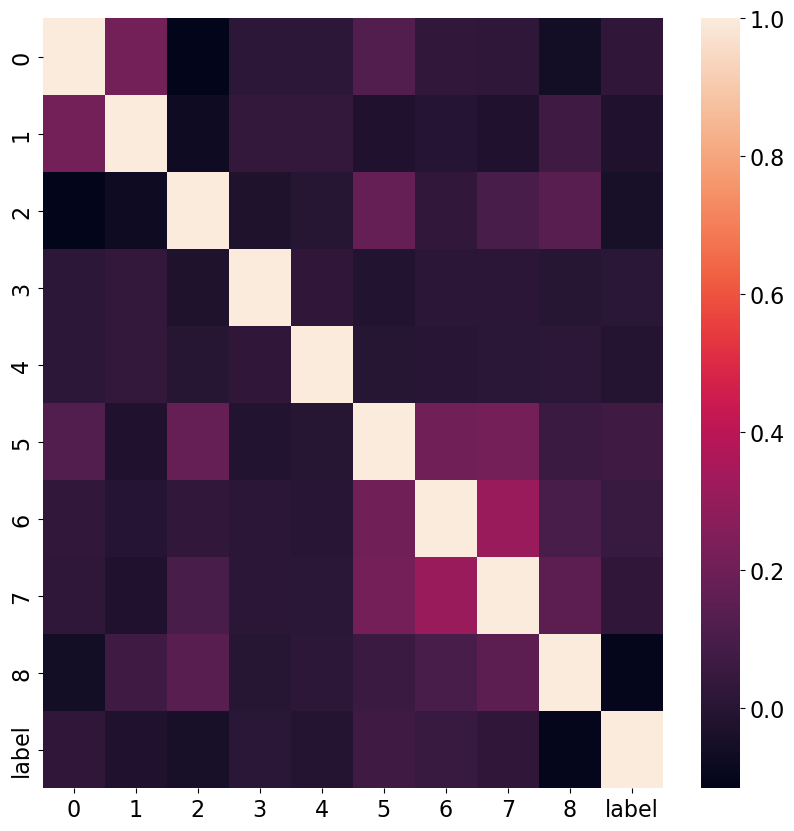

In [18]:
# scale numeric variables
scaler = StandardScaler()
df_final_numeric_scaled = scaler.fit_transform(df_final.select_dtypes(include=['float64', 'int64']))

# concatenate encoded and scaled dataframes
df_final_processed = np.concatenate((df_final_numeric_scaled, df_final_encoded), axis=1)

# add the labels back to the dataframe
df_final_processed = pd.DataFrame(df_final_processed)
df_final_processed['label']  = label

# correlation matrix
corr = df_final_processed.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr)

# split data into train and test sets
X = df_final_processed.iloc[:,:-1]
y = df_final_processed['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# fit and predict using logistic regression
clf_lr = LogisticRegression(random_state=0, max_iter=1000)

def model_fit_predict(model, X_train, y_train, X_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return y_pred

y_pred_train = model_fit_predict(clf_lr, X_train, y_train, X_train)



In [19]:
# calculate metrics for training data
f1 = round(f1_score(y_train, y_pred_train), 2)
acc = round(accuracy_score(y_train, y_pred_train), 2)
pre = round(precision_score(y_train, y_pred_train), 2)
print(f"Accuracy, precision and f1-score for training data are {acc}, {pre} and {f1} respectively") 

# check testing accuracy
y_pred_test = model_fit_predict(clf_lr, X_train, y_train, X_test)
f1 = round(f1_score(y_test, y_pred_test), 2)
acc = round(accuracy_score(y_test, y_pred_test), 2)
pre = round(precision_score(y_test, y_pred_test), 2)
print(f"Accuracy, precision and f1-score for testing data are {acc}, {pre} and {f1} respectively") 

# get feature importance
feat_importance = pd.DataFrame({'feature': X.columns, 'importance': abs(clf_lr.coef_[0])})
feat_importance = feat_importance.sort_values(by='importance', ascending=False)

# plot feature importance
feature_names = ['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour', 'flight_day', 'wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals', 'flight_duration']

plt.figure(figsize=(10,8))
plt.barh(feature_names, importance)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()
plt.figure(figsize=(10,5))
sns.barplot(x='importance', y='feature', data=feat_importance)
plt.title('Feature Importance')
plt.show()

Accuracy, precision and f1-score for training data are 0.85, 0.0 and 0.0 respectively
Accuracy, precision and f1-score for testing data are 0.85, 0.0 and 0.0 respectively


/Users/Software/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Software/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


NameError: name 'importance' is not defined

<Figure size 1000x800 with 0 Axes>